In [40]:
import sys
%pylab inline
sys.path.insert(1,'../../python/')

Populating the interactive namespace from numpy and matplotlib


In [223]:
from utils import CovarianceMatrix,plotting_tools

In [224]:
class QPM_Parameters:
    """Holds covariance matrix parameters for the QPM matrices. These are initially set to default values"""
    def __init__(self,mock_no,mean=False):
        self.n=40
        self.m=10
        self.a=1
        self.n_indiv=20
        if mean:
            self.infile_root='/mnt/store1/oliverphilcox/CMU/QPM_zero/'
        else:
            self.infile_root='/mnt/store1/oliverphilcox/CMU/QPM_Covariances3/Mock_%d/'%mock_no
        self.weights_file='/mnt/store1/oliverphilcox/CMU/weightfiles_zero/jackknife_weights_n40_m10_j169.dat'
        self.RR_file = '/mnt/store1/oliverphilcox/CMU/weightfiles_zero/binned_pair_counts_n40_m10_j169.dat'
        self.r_bins = np.loadtxt('../../python/binfile_zero.csv')         

In [225]:
x=np.loadtxt('/mnt/store1/oliverphilcox/CMU/weightfiles_zero/jackknife_weights_n40_m10_j169.dat')[:,1:]

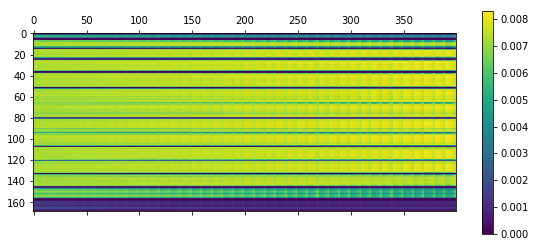

In [226]:
plt.matshow(x,vmax=np.percentile(x.ravel(),99.999));plt.colorbar();#plt.xlim([0,10]);plt.ylim([0,10])

In [227]:
c4=np.loadtxt('/mnt/store1/oliverphilcox/CMU/QPM_zero/CovMatricesAll/c4_n40_m10_11,11_full.txt')
c3=np.loadtxt('/mnt/store1/oliverphilcox/CMU/QPM_zero/CovMatricesAll/c3_n40_m10_1,11_full.txt')
c2=np.diag(np.loadtxt('/mnt/store1/oliverphilcox/CMU/QPM_zero/CovMatricesAll/c2_n40_m10_11_full.txt'))

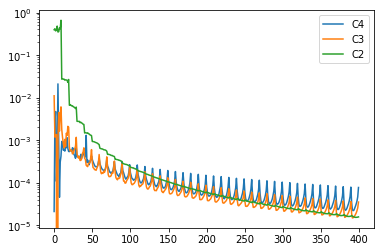

In [228]:
plt.plot(np.diag(c4),label='C4');plt.plot(np.diag(c3),label='C3');plt.plot(np.diag(c2),label='C2');
plt.yscale('log');plt.legend();

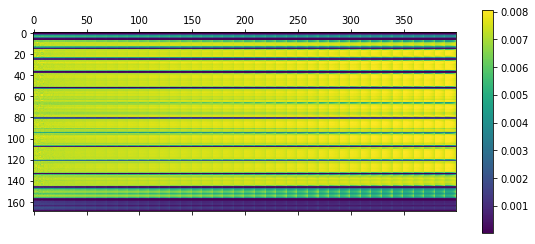

In [229]:
plt.matshow(x,vmax=np.percentile(x.ravel(),99),vmin=np.percentile(x.ravel(),0.1));plt.colorbar()

In [230]:
p=QPM_Parameters(1,mean=True)
mock1=CovarianceMatrix(p)

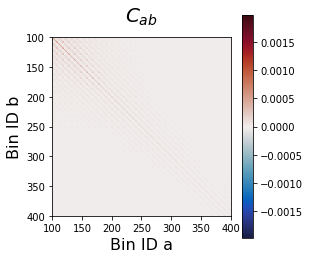

In [231]:
pt=plotting_tools()
pt.plot_covariance(mock1,bin_min=100,bin_max=400)


Now print to file:

In [235]:
mat=mock1.c_tot
with open("/mnt/store1/oliverphilcox/CMU/Mock1CovarianceZero.txt","w") as outfile:
    for i in range(len(mat)):
        for j in range(len(mat[0])):
            outfile.write("%.8e"%mat[i,j])
            if j==len(mat[0])-1:
                outfile.write("\n")
            else:
                outfile.write("\t")

In [236]:
x=np.loadtxt('/mnt/store1/oliverphilcox/CMU/Mock1CovarianceZero.txt')

In [234]:
len(x)

400

In [ ]:
min(np.abs(x.ravel()))

## Read Bias

In [244]:
c4bias=np.genfromtxt('/mnt/store1/oliverphilcox/CMU/QPM_Bias/CovMatricesAll/c4_n36_m10_11,11_full.txt')
c4norm=np.genfromtxt('/mnt/store1/oliverphilcox/CMU/QPM_Bias/CovMatricesJack/c4_n36_m10_11,11_full.txt')
c_tot = mock1.c_tot

In [245]:
#c4bias[np.isnan(c4bias)]=0.
#c4bias[np.isnan(c4bias)]=0.
#c4bias[c4bias>100]=0.

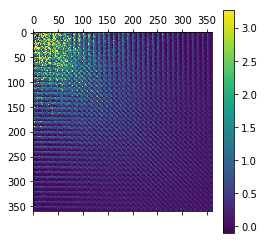

In [246]:
plt.matshow(c4bias,vmax=np.percentile(c4bias,99),vmin=np.percentile(c4bias,1));plt.colorbar()

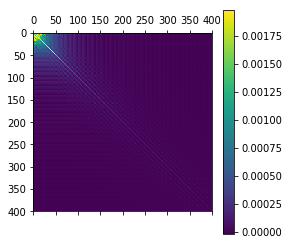

In [255]:
plt.matshow(c_tot,vmax=np.percentile(c_tot,99.9),vmin=np.percentile(c_tot,1));
plt.colorbar();#plt.xlim([0,20]);plt.ylim([20,0])

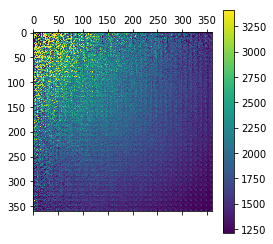

In [247]:
plt.matshow(c4norm,vmax=np.percentile(c4norm,99),vmin=np.percentile(c4norm,1));plt.colorbar()

## Tests

In [257]:
jk=np.loadtxt('/mnt/store1/oliverphilcox/CMU/weightfiles_zero_big/jackknife_weights_n180_m120_j169.dat')

In [261]:
jk[:,1:].shape

(169, 21600)

In [262]:
120*180

21600